In [ ]:
# import necessary libraries
import matplotlib as plt
import pandas as pd
import numpy as np
import bs4
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from scipy.spatial.distance import euclidean
import csv
import random
import re
from google.colab import files
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
!pip install openai
import openai
# API key generated
API_KEY = ''# Adjust API here

from openai import OpenAI
client = OpenAI(api_key = API_KEY)
# !pip install tiktoken
# Text Embedding
from transformers import BertTokenizer, BertModel
import torch

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


# Introduction


This report will guide the design of a course curriculum for a new “Master of Business and Management in Data Science and Artificial Intelligence” program at the University of Toronto based on the skill clusters generated from unsupervised machine learning algorithms (Hierarchical clustering and K-means clustering).


# Web Scraping - Indeed.com

To gather the initial dataset, we will scrap job postings for "data scientist" and "data analyst" roles from the U.S. section of Indeed.com. This is based on their popularity among data science and AI graduates.

Note: This part is for Web Scraping only. **The analysis starts from section one**.

General steps for Web Scraping
1. Check whether the website allows web scraping
2. Obtain the source code (HTML File) by using the website URL
3. Download the website content
4. Parse the content using keywords tags for elements of interest
5. Extract relevant data/features
6. Organize raw data in structured format (e.g., CSV)

## Instal Firefox, Selenium, Gecko Driver, Beautiful Soup

In [ ]:
#Install firefox
!apt-get update
!apt install firefox

#Install selenium
!pip install selenium

#Updating and installing firefox libraries
!apt-get update && apt-get install -y wget bzip2 libxtst6 libgtk-3-0 libx11-xcb-dev libdbus-glib-1-2 libxt6 libpci-dev && rm -rf /var/lib/apt/lists/*

#Installing Geck Driver
!wget https://github.com/mozilla/geckodriver/releases/download/v0.24.0/geckodriver-v0.24.0-linux64.tar.gz
!tar -xvzf geckodriver*
!chmod +x geckodriver
!export PATH=$PATH:/path-to-extracted-file/.

#Instal beautifulsoup
!pip install beautifulsoup4

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/multivers

## Import Dependencies

In [ ]:
import selenium.webdriver as webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions

import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By

import random
import time

## Define Position and Location

In [ ]:
## We serach key words data, scientist, analyst
position = "data+scientist+analyst"
## Modify location to US
locations = "US"

def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position, location)
    return url

url = get_url(position, locations)
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])
print(url)

https://www.indeed.com/jobs?q=data+scientist+analyst&l=US


## Set Path to Webdriver

In [ ]:
driver_path = '/content/geckodriver'
firefox_driver_path = '/content/geckodriver'
user_agent = 'Mozilla'
firefox_options = FirefoxOptions()
firefox_options.add_argument('--headless')
driver = webdriver.Firefox(options=firefox_options)

## Scrape Job Postings

In [ ]:
## Number of postings to scrape
postings = 1000

jn=0
for i in range(0, postings, 10):
    driver.get(url + "&start=" + str(i))
    driver.implicitly_wait(3)

    jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')
    #print(jobs)

    for job in jobs:
        #print(job)
        result_html = job.get_attribute('innerHTML')
        #print(result_html)
        soup = BeautifulSoup(result_html, 'html.parser')
        #print(soup , '\n')

        jn += 1

        liens = job.find_elements(By.TAG_NAME, "a")
        #print(liens)
        links = liens[0].get_attribute("href")
        #print(links)

        title = soup.select('.jobTitle')[0].get_text().strip()
        print(title)

        #company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
        #print(company)
        try:
            company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
            #print(company)
        except:
            company = 'Nan'
        print(company)
        #location = soup.select('.companyLocation')[0].get_text().strip() #origional
        #location = soup.select('.company_location')[0].get_text().strip()
        location = soup.find_all(attrs={'data-testid': 'text-location'})[0].get_text().strip()
        print(location)
        try:
            salary = soup.select('.salary-snippet-container')[0].get_text().strip()
        except:
            salary = 'NaN'
        try:
            rating = soup.select('.ratingNumber')[0].get_text().strip()
        except:
            rating = 'NaN'
        try:
            date = soup.select('.date')[0].get_text().strip()
        except:
            date = 'NaN'
        try:
            description = soup.select('.job-snippet')[0].get_text().strip()
        except:
            description = ''

        dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                          "Company": company,
                                          'Location': location,
                                          'Rating': rating,
                                          'Date': date,
                                          "Salary": salary,
                                          "Description": description,
                                          "Links": links}])], ignore_index=True)
        print("Job number {0:4d} added - {1:s}".format(jn,title))

流式输出内容被截断，只能显示最后 5000 行内容。
Scientist I - Bioanalytical
QPS, LLC
Newark, DE 19711
Job number  251 added - Scientist I - Bioanalytical
Research Analyst and Data Manager
Wabash College
Crawfordsville, IN 47933
Job number  252 added - Research Analyst and Data Manager
Petrophysicist
Devon Energy Corporation
Oklahoma City, OK
Job number  253 added - Petrophysicist
Project Policy Analyst-Part TIme
UCLA Health
Los Angeles, CA 90095
Job number  254 added - Project Policy Analyst-Part TIme
Geoscientist
Geotechnical Engineering
Elk Grove, IL
Job number  255 added - Geoscientist
Environmental Laboratory Analyst - ICP
Sterling Labs
Des Plaines, IL 60016
Job number  256 added - Environmental Laboratory Analyst - ICP
Project Policy Analyst-Part TIme
UCLA Health
Los Angeles, CA 90095
Job number  257 added - Project Policy Analyst-Part TIme
MHSA/Behavioral Health Policy Analyst
Clinical Buddy
Hybrid remote in Santa Ana, CA 92701
Job number  258 added - MHSA/Behavioral Health Policy Analyst
DNA Analyst

In [ ]:
dataframe.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,"Gaithersburg, MD 20878",NaN,PostedPosted 4 days ago,NaN,"Location: Gaithersburg, MD We are currently se...",https://www.indeed.com/rc/clk?jk=3f8fd2b9b5fc7...
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"Trenton, NJ 08611 (Downtown area)",NaN,EmployerActive 3 days ago,"$90,061.97 - $136,893.13 a year",When you come to work for New Jersey Judiciary...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Global Health Data Analyst,University of Minnesota,"Minneapolis, MN",NaN,PostedPosted 19 days ago,NaN,Required Qualifications • BS/BA in an applied ...,https://www.indeed.com/rc/clk?jk=18a5265f9cd9c...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"Milford, CT",NaN,PostedPosted 1 day ago,"$57,291 - $81,354 a year","The State of Connecticut, Department of Agricu...",https://www.indeed.com/rc/clk?jk=feccdfcf5269a...
4,Data Analyst/Scientist,Travis County,"Travis County, TX",NaN,PostedPosted 25 days ago,NaN,Job Summary Travis County Auditor’s Office has...,https://www.indeed.com/rc/clk?jk=a763d844b7610...


##  Scrape Full Job Descriptions

In [ ]:
Links_list = dataframe['Links'].tolist()
#Links_list

In [ ]:
descriptions=[]
for i in Links_list:
  try:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))
  except:
    descriptions.append("Not Found")

dataframe['Descriptions'] = descriptions

## Save Results

In [ ]:
# Convert the dataframe to a csv file
date = datetime.today().strftime('%Y-%m-%d')
dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

In [ ]:
dataframe.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,"Gaithersburg, MD 20878",NaN,PostedPosted 4 days ago,NaN,"Location: Gaithersburg, MD We are currently se...",https://www.indeed.com/rc/clk?jk=3f8fd2b9b5fc7...,"Location: Gaithersburg, MD\n\nWe are currently..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"Trenton, NJ 08611 (Downtown area)",NaN,EmployerActive 3 days ago,"$90,061.97 - $136,893.13 a year",When you come to work for New Jersey Judiciary...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,When you come to work for New Jersey Judiciary...
2,Global Health Data Analyst,University of Minnesota,"Minneapolis, MN",NaN,PostedPosted 19 days ago,NaN,Required Qualifications • BS/BA in an applied ...,https://www.indeed.com/rc/clk?jk=18a5265f9cd9c...,Required Qualifications\nBS/BA in an applied d...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"Milford, CT",NaN,PostedPosted 1 day ago,"$57,291 - $81,354 a year","The State of Connecticut, Department of Agricu...",https://www.indeed.com/rc/clk?jk=feccdfcf5269a...,"The State of Connecticut, Department of Agricu..."
4,Data Analyst/Scientist,Travis County,"Travis County, TX",NaN,PostedPosted 25 days ago,NaN,Job Summary Travis County Auditor’s Office has...,https://www.indeed.com/rc/clk?jk=a763d844b7610...,Job Summary\nTravis County Auditor’s Office ha...


##  Download the Result for future Analysis (Saving time from rescraping web)

In [ ]:
from google.colab import files
files.download(date + "_" + position + "_" + locations + ".csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1. Data Collection and Cleaning

Web scraping is done above. Our scraping results in a raw dataset of 1,500 job listings, each detailed across 9 columns. We will do analysis from downloaded result from web scraping.

In [ ]:
## load data
from google.colab import files
uploaded = files.upload()

Saving 2023-11-19_data+scientist+analyst_US.csv to 2023-11-19_data+scientist+analyst_US.csv


In [ ]:
df = pd.read_csv('2023-11-19_data+scientist+analyst_US.csv',encoding='latin1') ## note: Adjust csv name here
df

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,"Gaithersburg, MD 20878",NaN,PostedPosted 4 days ago,NaN,"Location: Gaithersburg, MD We are currently se...",https://www.indeed.com/rc/clk?jk=3f8fd2b9b5fc7...,"Location: Gaithersburg, MD\n\nWe are currently..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"Trenton, NJ 08611Â (Downtown area)",NaN,EmployerActive 3 days ago,"$90,061.97 - $136,893.13 a year",When you come to work for New Jersey Judiciary...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,When you come to work for New Jersey Judiciary...
2,Global Health Data Analyst,University of Minnesota,"Minneapolis, MN",NaN,PostedPosted 19 days ago,NaN,Required Qualifications â¢ BS/BA in an applie...,https://www.indeed.com/rc/clk?jk=18a5265f9cd9c...,Required Qualifications\nBS/BA in an applied d...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"Milford, CT",NaN,PostedPosted 1 day ago,"$57,291 - $81,354 a year","The State of Connecticut, Department of Agricu...",https://www.indeed.com/rc/clk?jk=feccdfcf5269a...,"The State of Connecticut, Department of Agricu..."
4,Data Analyst/Scientist,Travis County,"Travis County, TX",NaN,PostedPosted 25 days ago,NaN,Job Summary Travis County Auditorâs Office h...,https://www.indeed.com/rc/clk?jk=a763d844b7610...,Job Summary\nTravis County Auditorâs Office ...
...,...,...,...,...,...,...,...,...,...
1495,Business & Legal Research Analyst,DLA Piper,"Remote in Boston, MA",NaN,PostedPosted 30+ days ago,NaN,Strong research skills including an ability to...,https://www.indeed.com/rc/clk?jk=199eeb9e36595...,DLA Piper is an equal-opportunity employer. Al...
1496,"Equity Research Analyst, Social Justice Collab...",Emerson College,"Hybrid remote in Boston, MA 02116",NaN,PostedPosted 18 days ago,"$85,198 - $106,497 a year",Extensive experience in disaggregating data an...,https://www.indeed.com/rc/clk?jk=cbcbab38fa9e4...,"Equity Research Analyst, Social Justice Collab..."
1497,Public Health Analyst - Dementia Focus,RTI International,"Washington, DC",NaN,PostedPosted 30+ days ago,NaN,"Conduct site visits, interviews, and other dat...",https://www.indeed.com/rc/clk?jk=3f3987fbc203b...,Overview\n\nThe Health Practice Area at RTI In...
1498,Research Financial Analyst (RSCH ADM 3),"University of California, Davis","Hybrid remote in Davis, CA 95616",NaN,PostedPosted 1 day ago,"$65,100 - $116,700 a year",Ability to organize and analyze finance and ot...,https://www.indeed.com/rc/clk?jk=25d427d2fc773...,#CA-TJ\nThis position serves as a Research Adm...




*   Our original data set contains 1500 rows and 9 columns.
*   We also realize some null values. Therefore, we need to clean them.
*   **Description** contains similar information as **Descriptions** which contains more comprehensive information. We will drop **Description**
*   The **Descriptions** seems to be really raw. So, we will clean it in a following step as well.
*   **Links** and **Location** is not helpful for clustering because they should be random. We will drop it.








In [ ]:
## Keep only neccessary columns
df=df[['Title','Company','Salary','Location','Rating','Descriptions']]
df

,Title,Company,Salary,Location,Rating,Descriptions
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,NaN,"Gaithersburg, MD 20878",NaN,"Location: Gaithersburg, MD\n\nWe are currently..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",NaN,When you come to work for New Jersey Judiciary...
2,Global Health Data Analyst,University of Minnesota,NaN,"Minneapolis, MN",NaN,Required Qualifications\nBS/BA in an applied d...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT",NaN,"The State of Connecticut, Department of Agricu..."
4,Data Analyst/Scientist,Travis County,NaN,"Travis County, TX",NaN,Job Summary\nTravis County Auditorâs Office ...
...,...,...,...,...,...,...
1495,Business & Legal Research Analyst,DLA Piper,NaN,"Remote in Boston, MA",NaN,DLA Piper is an equal-opportunity employer. Al...
1496,"Equity Research Analyst, Social Justice Collab...",Emerson College,"$85,198 - $106,497 a year","Hybrid remote in Boston, MA 02116",NaN,"Equity Research Analyst, Social Justice Collab..."
1497,Public Health Analyst - Dementia Focus,RTI International,NaN,"Washington, DC",NaN,Overview\n\nThe Health Practice Area at RTI In...
1498,Research Financial Analyst (RSCH ADM 3),"University of California, Davis","$65,100 - $116,700 a year","Hybrid remote in Davis, CA 95616",NaN,#CA-TJ\nThis position serves as a Research Adm...


## 1.1 Check Null Values

In [ ]:
## Count null values in each column
null_col = df.isnull().sum(axis=0)
print(null_col)

Title              0
Company            0
Salary           791
Location           0
Rating          1500
Descriptions       0
dtype: int64




*   1500 observations have null value in **Rating**. This feature does not provide any information. Therefore, we will drop this column.
*   For **Salary**, we will simply fill null values with 'Unknown' to indicate that the salary entity was not successfully scraped.



In [ ]:
## drop rating
df = df.drop(columns = ['Rating'])

In [ ]:
## fill null values with Unkown
df['Salary'] = df['Salary'].fillna('Unkown')
df

,Title,Company,Salary,Location,Descriptions
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","Location: Gaithersburg, MD\n\nWe are currently..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",When you come to work for New Jersey Judiciary...
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",Required Qualifications\nBS/BA in an applied d...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","The State of Connecticut, Department of Agricu..."
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",Job Summary\nTravis County Auditorâs Office ...
...,...,...,...,...,...
1495,Business & Legal Research Analyst,DLA Piper,Unkown,"Remote in Boston, MA",DLA Piper is an equal-opportunity employer. Al...
1496,"Equity Research Analyst, Social Justice Collab...",Emerson College,"$85,198 - $106,497 a year","Hybrid remote in Boston, MA 02116","Equity Research Analyst, Social Justice Collab..."
1497,Public Health Analyst - Dementia Focus,RTI International,Unkown,"Washington, DC",Overview\n\nThe Health Practice Area at RTI In...
1498,Research Financial Analyst (RSCH ADM 3),"University of California, Davis","$65,100 - $116,700 a year","Hybrid remote in Davis, CA 95616",#CA-TJ\nThis position serves as a Research Adm...


## 1.2 Clean Descriptions

In [ ]:
import re


# Function to clean the text
def clean_description(text):
    # Remove HTML tags if any
    text = re.sub('<.*?>', '', text)
    # Replace special characters with a space (except . , ! ?)
    text = re.sub('[^A-Za-z0-9.,!?]+', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(' +', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the Descriptions column
df['Descriptions'] = df['Descriptions'].apply(clean_description)

# Display the first few rows to confirm changes
print(df['Descriptions'].head())

0    location gaithersburg, md we are currently see...
1    when you come to work for new jersey judiciary...
2    required qualifications bs ba in an applied da...
3    the state of connecticut, department of agricu...
4    job summary travis county auditor s office has...
Name: Descriptions, dtype: object


In [ ]:
df.head()

,Title,Company,Salary,Location,Descriptions
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu..."
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...




*   Our data is cleaned now. We are ready to analysis.



# 1.3 Extract Salary

We notice that **Salary** provides numerical information about jobs. We will extract numerical salary from the **Salary** column. For records with unknown salaries, we will assign the average salary for a data analyst in the US to them. According to Indeed, the average salary for a data analyst in the US is $76834 per year. If the salary is a range, we will calculate the average.

In [ ]:
# Extract salary as a numerical column
def extract_salary(salary_str):
    # Regular expression to find numbers in the salary strings
    salary_pattern = r'(\d{1,3}(?:,\d{3})+(?:\.\d{2})?)'

    # Find all occurrences of the pattern
    salaries = re.findall(salary_pattern, salary_str.replace('$','').replace(' ',''))

    # If there are no salaries found (e.g., 'Unknown'), return average DA salary in US
    if not salaries:
        return 76834

    # If there's a range, calculate the average, otherwise return the single value found
    if len(salaries) == 2:
        return (float(salaries[0].replace(',','')) + float(salaries[1].replace(',',''))) / 2
    else:
        return float(salaries[0].replace(',',''))

# Apply the function to the 'Salary' column
df['Extracted_Salary'] = df['Salary'].apply(lambda x: extract_salary(x) if pd.notnull(x) else x)

In [ ]:
df.head()

,Title,Company,Salary,Location,Descriptions,Extracted_Salary
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.00
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...,113477.55
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...,76834.00
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu...",69322.50
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.00


# 2. Exploratory Data Analysis and Feature Engineering

## 2.1 Engineer Features for Clustering Analysis

### 2.1.1 Skills Brainstorming and Chat-GPT

In [ ]:
## Define skills from my own knowledge
skills_my = ['business analysis', 'investigation', 'programming', 'data engineering','data visualization', 'research','ethic', 'innovative', 'initiative','modeling','source dealing','business modeling','colaboration','analysis', 'Analytical Techniques', 'Presentaions', 'Python', 'C++','GitHub', 'excel','MS office', 'query', 'jupyter notebook','data manipulation','detail oriented','administration','Responsible AI', 'Critical Thinking', 'Logical Reasoning','Azure', 'AWS','Git', 'Database Design', 'Neural Networks', 'Apache Spark', 'MATLAB','R', 'Business Intelligence', 'SPSS', 'SAS', 'Creativity', 'Teamwork', 'Consulting', 'Project Management', 'Negotiation Skills']

In [ ]:
## Ask Chat-GPT
# get response
response = client.chat.completions.create(
  messages=[
      {
          "role": "user",
          "content": "Please give me a list of relevant skills (Key words) name for a data sicence related job",
      }
  ],
    model="gpt-3.5-turbo-16k-0613",
    seed = 300
)


In [ ]:
# Extract the answer from the response
skills_gpt = response.choices[0].message.content

# Split the skills into a list
skills_gpt = skills_gpt.split("\n")

# Strip whitespace from each skill
skills_gpt = list(map(lambda x: re.sub(r'^\d+\.\s*', '', x), skills_gpt))


# drop first 2 elements
skills_gpt.pop(0)
skills_gpt.pop(0)
skills_gpt

print("GPT generated Skills:", np.array(skills_gpt))

GPT generated Skills: ['Data analysis' 'Statistical analysis' 'Machine learning'
 'Data visualization' 'Python' 'R programming' 'SQL' 'Big data'
 'Predictive modeling' 'Natural language processing (NLP)' 'Deep learning'
 'Neural networks' 'Data mining' 'Data cleansing' 'Data preprocessing'
 'Data wrangling' 'Exploratory data analysis (EDA)' 'Hypothesis testing'
 'A/B testing' 'Feature engineering' 'Time series analysis'
 'Dimensionality reduction' 'Ensemble methods' 'Cross-validation'
 'Regression analysis' 'Classification models' 'Clustering algorithms'
 'Anomaly detection' 'Data storytelling' 'Problem-solving skills'
 'Critical thinking' 'Mathematical proficiency' 'Communication skills'
 'Domain knowledge' 'Data-driven decision making' 'Ethical data use'
 'Experiment design' 'Cloud computing' 'Data architecture' 'TensorFlow']


In [ ]:
# combine manual and gpt skills
all_skills = skills_gpt + skills_my


In [ ]:
## lowercase skill set to ensure consistancy
all_skills = list(map(lambda x: x.lower(),all_skills))
print("All skills:", np.array(all_skills))

All skills: ['data analysis' 'statistical analysis' 'machine learning'
 'data visualization' 'python' 'r programming' 'sql' 'big data'
 'predictive modeling' 'natural language processing (nlp)' 'deep learning'
 'neural networks' 'data mining' 'data cleansing' 'data preprocessing'
 'data wrangling' 'exploratory data analysis (eda)' 'hypothesis testing'
 'a/b testing' 'feature engineering' 'time series analysis'
 'dimensionality reduction' 'ensemble methods' 'cross-validation'
 'regression analysis' 'classification models' 'clustering algorithms'
 'anomaly detection' 'data storytelling' 'problem-solving skills'
 'critical thinking' 'mathematical proficiency' 'communication skills'
 'domain knowledge' 'data-driven decision making' 'ethical data use'
 'experiment design' 'cloud computing' 'data architecture' 'tensorflow'
 'business analysis' 'investigation' 'programming' 'data engineering'
 'data visualization' 'research' 'ethic' 'innovative' 'initiative'
 'modeling' 'source dealing' 'busi

### 2.1.2 Extract skills using N-grams


In [ ]:
indeed_df = df.copy()
# We need to download Punkt tokenizer
nltk.download('punkt')
# Function to tokenize text into bigrams and trigrams
def extract_skills(description, all_skills):
    # Tokenize the text into words
    tokens = word_tokenize(description)
    # Generate 1-gram, bigrams and trigrams
    one_gram = list(ngrams(tokens, 1))
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))
    # Combine bigrams and trigrams
    all_ngrams = bigrams + trigrams+one_gram
    # Convert ngram tuples to normal strings
    all_ngrams = [' '.join(ngram).lower() for ngram in all_ngrams]
    # Filter the ngrams by the skill set
    found_skills = set(all_ngrams).intersection(all_skills)
    return list(found_skills)

# Apply the function to the 'Descriptions' column
indeed_df['ExtractedSkills'] = indeed_df['Descriptions'].apply(lambda desc: extract_skills(desc, all_skills))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
indeed_df

,Title,Company,Salary,Location,Descriptions,Extracted_Salary,ExtractedSkills
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.00,"[analysis, analytical techniques, critical thi..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...,113477.55,"[spss, data analysis, statistical analysis, sa..."
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...,76834.00,"[communication skills, r, teamwork, data analy..."
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu...",69322.50,"[communication skills, research, analysis]"
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.00,"[anomaly detection, spss, consulting, statisti..."
...,...,...,...,...,...,...,...
1495,Business & Legal Research Analyst,DLA Piper,Unkown,"Remote in Boston, MA",dla piper is an equal opportunity employer. al...,76834.00,[research]
1496,"Equity Research Analyst, Social Justice Collab...",Emerson College,"$85,198 - $106,497 a year","Hybrid remote in Boston, MA 02116","equity research analyst, social justice collab...",95847.50,"[communication skills, r, spss, modeling, data..."
1497,Public Health Analyst - Dementia Focus,RTI International,Unkown,"Washington, DC",overview the health practice area at rti inter...,76834.00,"[communication skills, r, data analysis, sas, ..."
1498,Research Financial Analyst (RSCH ADM 3),"University of California, Davis","$65,100 - $116,700 a year","Hybrid remote in Davis, CA 95616",ca tj this position serves as a research admin...,90900.00,"[excel, investigation, research, initiative]"


In [ ]:
# Count rows contain empty extracted skill list
empty_list_count = (indeed_df['ExtractedSkills'].apply(lambda x: len(x) == 0)).sum()
print(f'There are {empty_list_count} rows contain empty skill set')

There are 32 rows contain empty skill set




*   After applyting N-grams to extract skills from **Descriptions**, we find 32 rows contain empty skill set. Therefore, we will drop these rows.


In [ ]:
## drop rows contain empty skill set
indeed_df = indeed_df[indeed_df['ExtractedSkills'].str.len() > 0]
indeed_df.head()

,Title,Company,Salary,Location,Descriptions,Extracted_Salary,ExtractedSkills
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.00,"[analysis, analytical techniques, critical thi..."
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...,113477.55,"[spss, data analysis, statistical analysis, sa..."
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...,76834.00,"[communication skills, r, teamwork, data analy..."
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu...",69322.50,"[communication skills, research, analysis]"
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.00,"[anomaly detection, spss, consulting, statisti..."


### 2.1.3 Feature Engineering


#### 2.1.3.1 Manual Feature Engineering

In [ ]:
## Create dummy columns for Extracted skills
for skill in all_skills:
  indeed_df.loc[:, skill] = indeed_df['ExtractedSkills'].apply(lambda x: skill in x).astype(int)
indeed_df.head()

,Title,Company,Salary,Location,Descriptions,Extracted_Salary,ExtractedSkills,data analysis,statistical analysis,machine learning,...,matlab,r,business intelligence,spss,sas,creativity,teamwork,consulting,project management,negotiation skills
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.00,"[analysis, analytical techniques, critical thi...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...,113477.55,"[spss, data analysis, statistical analysis, sa...",1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...,76834.00,"[communication skills, r, teamwork, data analy...",1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu...",69322.50,"[communication skills, research, analysis]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.00,"[anomaly detection, spss, consulting, statisti...",0,1,1,...,0,0,0,1,1,0,0,1,0,0


#### 2.1.3.2 Text Embeddings with Bert

In [ ]:
# Initialize the tokenizer and model from the pre-trained BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# create function for text embedding
def get_embedding(text):
  # Ensure model is in evaluation mode
  model.eval()
  # Tokenize and encode the text
  encoded_input = tokenizer(text, return_tensors='pt', padding = True, truncation = True, max_length = 512)
  # Generate embeddings
  with torch.no_grad():
    outputs = model(**encoded_input)
  # Use the mean of the last hidden state as the embedding
  embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()

  # Move the embeddings back to the CPU and convert to numpy
  return embeddings.cpu().numpy()




tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Add a column with embeddings to the DataFrame
indeed_df['description_Embeddings'] = indeed_df['Descriptions'].apply(lambda x: get_embedding(x))

### 2.2 Visualize Key Information

In [ ]:
## plot count of each skills
df_skills = indeed_df.drop(columns=['Title', 'Company', 'Salary', 'Location', 'Descriptions','ExtractedSkills','description_Embeddings','Extracted_Salary'])
## count number of each skills
sum_skills = df_skills.sum()

sum_skills

data analysis           409
statistical analysis    168
machine learning         90
data visualization      112
python                  259
                       ... 
creativity               68
teamwork                 98
consulting              104
project management      222
negotiation skills        0
Length: 81, dtype: int64



*   We will drop skill columns with less than 4 observations to decrease the complexity of our modeling in later section.



In [ ]:
## drop columns with less than 4 observations
for col in df_skills.columns:
  if sum_skills[col] <= 4:
    df_skills = df_skills.drop(columns=[col])
    indeed_df = indeed_df.drop(columns=[col])
## count number of each skills
sum_skills = df_skills.sum()

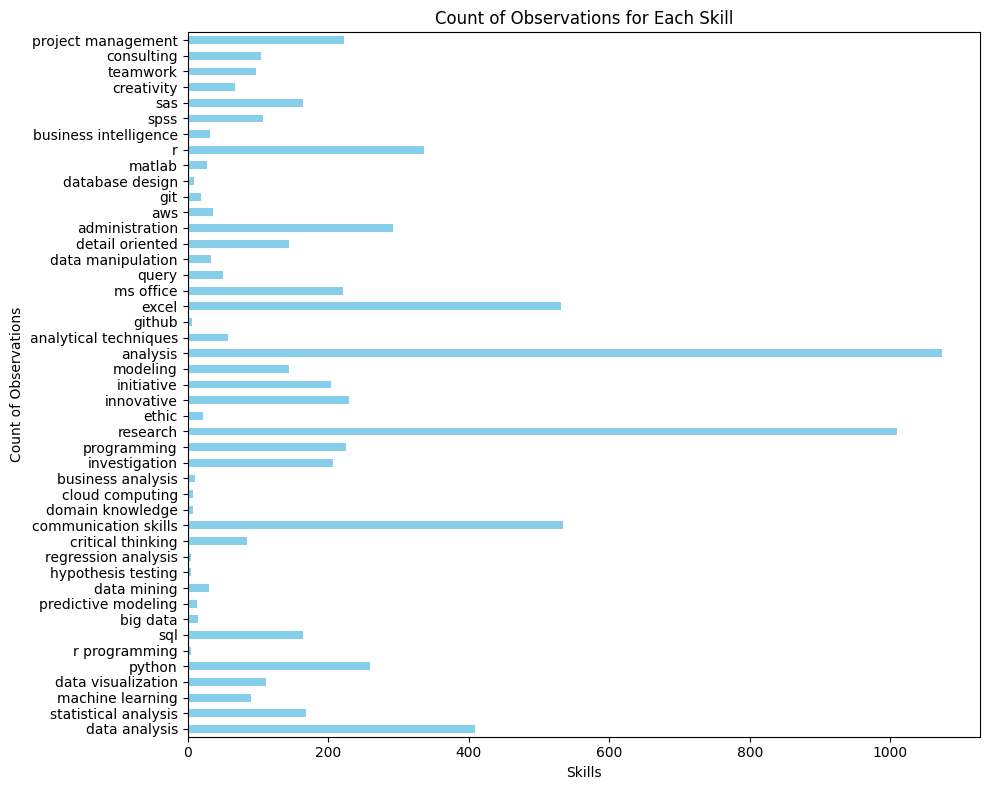

In [ ]:
## Generate a bar plot
plt.figure(figsize=(10, 8))
sum_skills.plot(kind='barh', color='skyblue')
plt.title('Count of Observations for Each Skill')
plt.xlabel('Skills')
plt.ylabel('Count of Observations')
plt.tight_layout()
plt.show()



*   The most required skills are **Analysis**, **Research**, and **Communication**




In [ ]:
## Compare skill needed for scientist and analyst
df_scientist = indeed_df[indeed_df['Title'].str.lower().str.contains('scientist')]
df_analyst = indeed_df[indeed_df['Title'].str.lower().str.contains('analyst')]
print(df_scientist.shape, df_analyst.shape)

(158, 53) (957, 53)


In [ ]:
df_scientist.head()

,Title,Company,Salary,Location,Descriptions,Extracted_Salary,ExtractedSkills,data analysis,statistical analysis,machine learning,...,matlab,r,business intelligence,spss,sas,creativity,teamwork,consulting,project management,description_Embeddings
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.0,"[analysis, analytical techniques, critical thi...",0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.35947698, 0.120966054, 0.3096817, 0.099531..."
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.0,"[anomaly detection, spss, consulting, statisti...",0,1,1,...,0,0,0,1,1,0,0,1,0,"[-0.32066697, 0.41456622, 0.4586632, 0.1659725..."
6,"Scientist, Biologics (Mass Spec)",SGS,Unkown,"Lincolnshire, IL 60069",company description sgs is the world s leading...,76834.0,"[analytical techniques, analysis, initiative]",0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.31976044, 0.3182488, 0.36204192, 0.0092468..."
7,Scientist,Noven Pharmaceuticals,Unkown,"Miami, FL 33186","overview performs professional, technical labo...",76834.0,"[communication skills, teamwork, initiative, i...",0,0,0,...,0,0,0,0,0,0,1,0,0,"[-0.26768312, 0.3765498, 0.32402027, -0.012506..."
9,Data Scientist,The University of Pittsburgh,Unkown,"Pittsburgh, PA",data scientist dent med center for craniofacia...,76834.0,"[r, detail oriented, data analysis, statistica...",1,1,0,...,0,1,0,0,0,0,0,0,0,"[-0.31240302, 0.30954093, 0.28833848, -0.02462..."


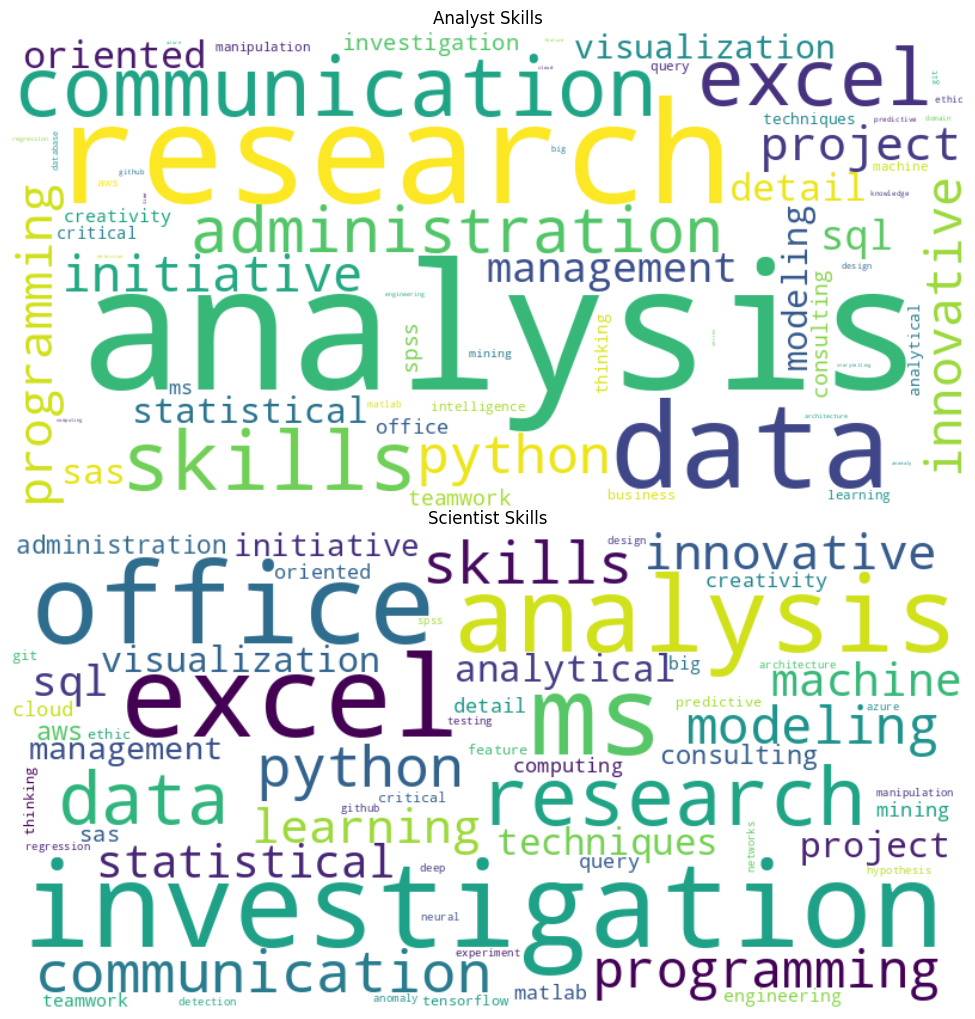

In [ ]:
# plot the wordcloud for each job category
from wordcloud import WordCloud
# concatenate all the text from the selected column into a single string
text_scientist = ' '.join(df_scientist['ExtractedSkills'].map(lambda x: ' '.join(x)).tolist())
text_analyst = ' '.join(df_analyst['ExtractedSkills'].map(lambda x: ' '.join(x)).tolist())

## create the WordCloud object with desired settings
wordcloud_scientist = WordCloud(width=800, height=400, background_color='white', max_words=100, collocations=False).generate(text_scientist)
wordcloud_analyst = WordCloud(width=800, height=400, background_color='white', max_words=100, collocations=False).generate(text_analyst)

# Plot both WordCloud images side by side
plt.figure(figsize=(20, 10))

# Plot for analyst
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_analyst, interpolation='bilinear')
plt.title('Analyst Skills')
plt.axis('off')  # Remove the axis for the analyst word cloud

# Plot for scientist
plt.subplot(2, 1, 2)
plt.imshow(wordcloud_scientist, interpolation='bilinear')
plt.title('Scientist Skills')
plt.axis('off')  # Remove the axis for the scientist word cloud
plt.savefig('Wordcloud')
plt.tight_layout(pad=0)  # Make the layout tight
plt.show()



*   For both Analyst and Scientist jobs, **Analysis** and **Communication** are both mentioned a lot in their job descriptions as well.

*   Scientist jobs are a bit more technical oriented as **ASW**, **Matlab**, **Machine** (considered as **Machine Learning**), and **cloud** appear more frequently.





In [ ]:
## count skills for DA and DS
df_scientist_skills_count = df_scientist.drop(columns=['Title', 'Company', 'Salary', 'Location', 'Descriptions','ExtractedSkills','description_Embeddings','Extracted_Salary']).sum()
df_analyst_skills_count = df_analyst.drop(columns=['Title', 'Company', 'Salary', 'Location', 'Descriptions','ExtractedSkills','description_Embeddings','Extracted_Salary']).sum()
skills = df_skills.columns

In [ ]:
df_scientist_skills_count

data analysis             13
statistical analysis      12
machine learning          12
data visualization         9
python                    19
r programming              2
sql                       11
big data                   3
predictive modeling        2
data mining                4
hypothesis testing         1
regression analysis        1
critical thinking          2
communication skills      20
domain knowledge           0
cloud computing            4
business analysis          0
investigation            101
programming               14
research                  41
ethic                      2
innovative                14
initiative                 8
modeling                  14
analysis                  54
analytical techniques      9
github                     1
excel                     93
ms office                 92
query                      4
data manipulation          1
detail oriented            4
administration             6
aws                        6
git           

In [ ]:
## since there are more observations in analyst, we need to rescale the data
df_scientist_skills_count_norm = df_scientist_skills_count / np.linalg.norm(df_scientist_skills_count)
df_analyst_skills_count_norm = df_analyst_skills_count / np.linalg.norm(df_analyst_skills_count)

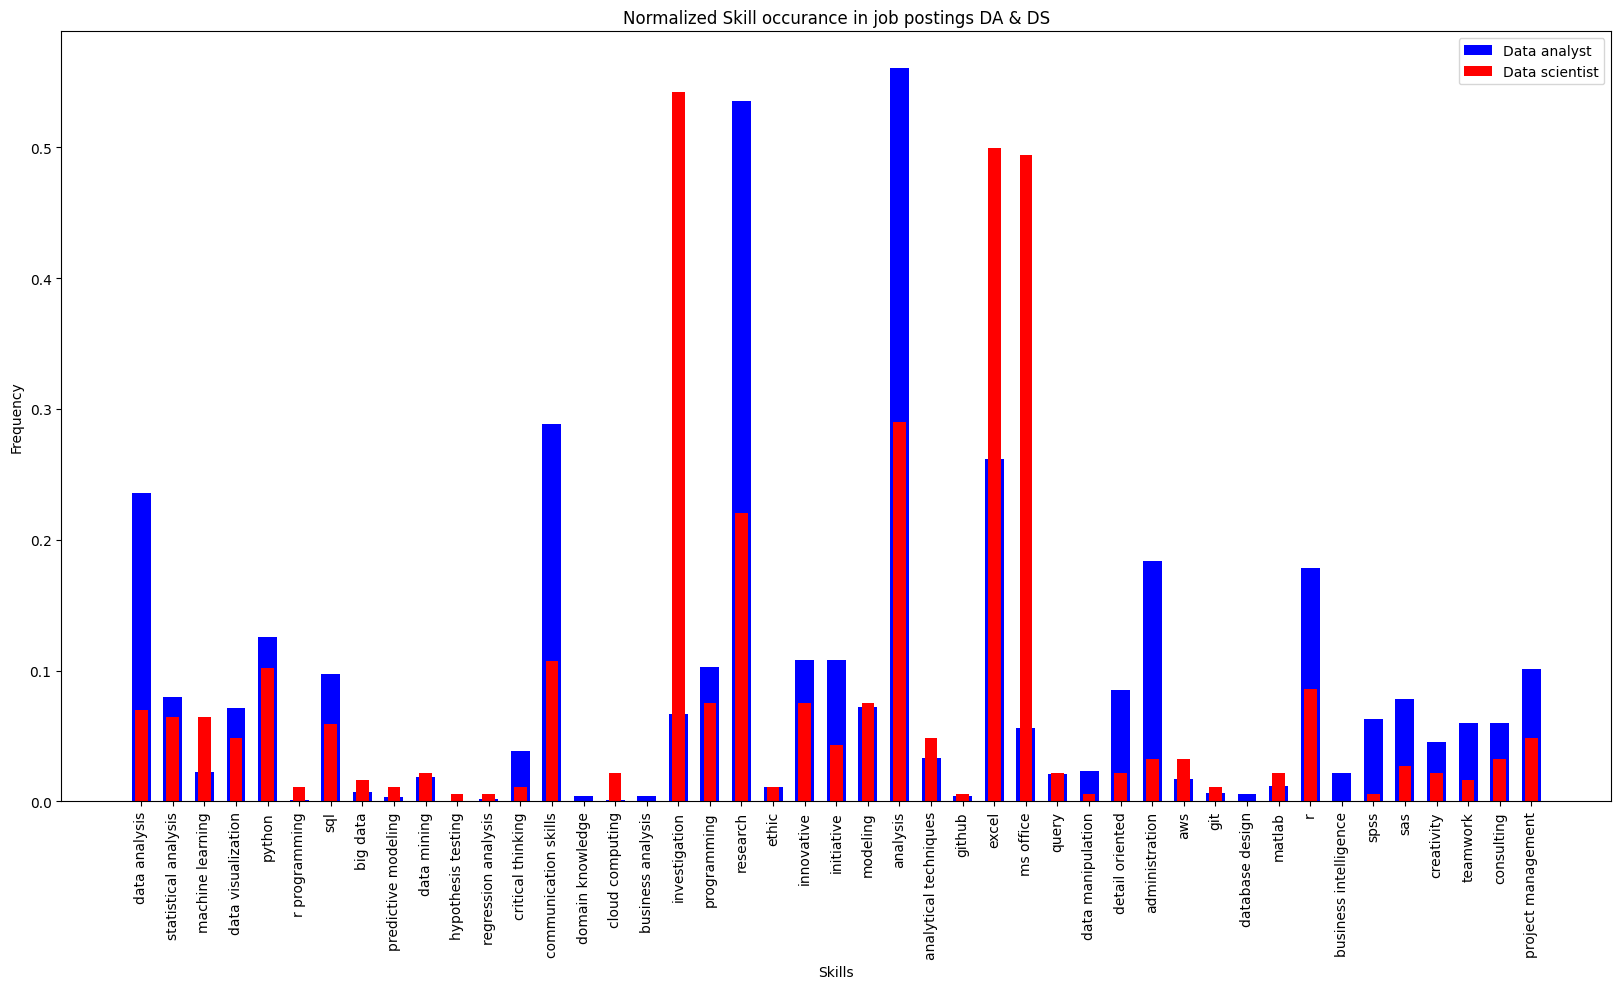

In [ ]:
# plot da vs ds in skills
plt.figure(figsize=(20, 10))
plt.bar(skills, df_analyst_skills_count_norm, color ='blue',
        width = 0.6,label = 'Data analyst')
plt.bar(skills, df_scientist_skills_count_norm, color ='red',
        width = 0.4,label = 'Data scientist')
plt.xticks(rotation=90,size=10)
plt.title('Normalized Skill occurance in job postings DA & DS')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Skilled')
plt.show()



*   From this plot, we can have a clearer view to compare count of each skills in analyst and scientist jobs.
*   Most highly technical oriented skills such as **hypothesis testing, deep learning, and neural networks** are mostly only required by scientist jobs.



# 3. Hierarchical Clustering Implementation



In this section, we will use hierarchical clustering with clustering skill accroding to the proximity matrix. We first select all the skills columns from our data set. Then, by calculating hamming distance between two skills. In paticular, we consider two skills are more similar to each other if the hamming distance would be samll meaning these two skills are required in many postings.

In [ ]:
# convert skills data set into array
df_skills = df_skills.reset_index().drop(columns=['index'])
arr_skills = normalize(np.array(df_skills.values), axis=1)
arr_skills.shape

(1468, 45)

## 3.1 Create Proximity Matrix

Since our columns are binary columns. The **Euclidean distance** is not suitable because it is more appropriate for continuous data. Instead, we will use **Hamming Distance** to determine the difference between pairs of skills. It measures the proportion of binary variables that differ between two binary vectors. If two skills appear simultaneously in many of our observations, we will conclude they are similar to each other and their **Hamming Distance** will be closer to 0. Conversely, if they rarely appear together, their **Hamming Distance** will be higher, approaching 1, indicating greater dissimilarity.

In [ ]:
# empty matrix
distance_matrix = np.zeros([arr_skills.shape[1],arr_skills.shape[1]])

# Function to calculate Hamming distance
def hamming_distance(x, y):
    return np.sum(x != y) / len(x)

# Generate a distance matrix
for i in range(arr_skills.shape[1]):
    for j in range(arr_skills.shape[1]):
        # calculate euclidean distance between skill i and skill j
        distance_matrix[i,j] = hamming_distance(arr_skills[:, i], arr_skills[:, j])



print(distance_matrix)

[[0.         0.29359673 0.28678474 ... 0.30722071 0.3113079  0.33174387]
 [0.29359673 0.         0.13623978 ... 0.17302452 0.17983651 0.19073569]
 [0.28678474 0.13623978 0.         ... 0.126703   0.1226158  0.15258856]
 ...
 [0.30722071 0.17302452 0.126703   ... 0.         0.13079019 0.19482289]
 [0.3113079  0.17983651 0.1226158  ... 0.13079019 0.         0.1880109 ]
 [0.33174387 0.19073569 0.15258856 ... 0.19482289 0.1880109  0.        ]]


In [ ]:
# construct hierarchical clustering
Y = sch.linkage(distance_matrix, method='centroid')

In [ ]:
## Cutting the dendrogram at max_d
max_d = 0.5

[]

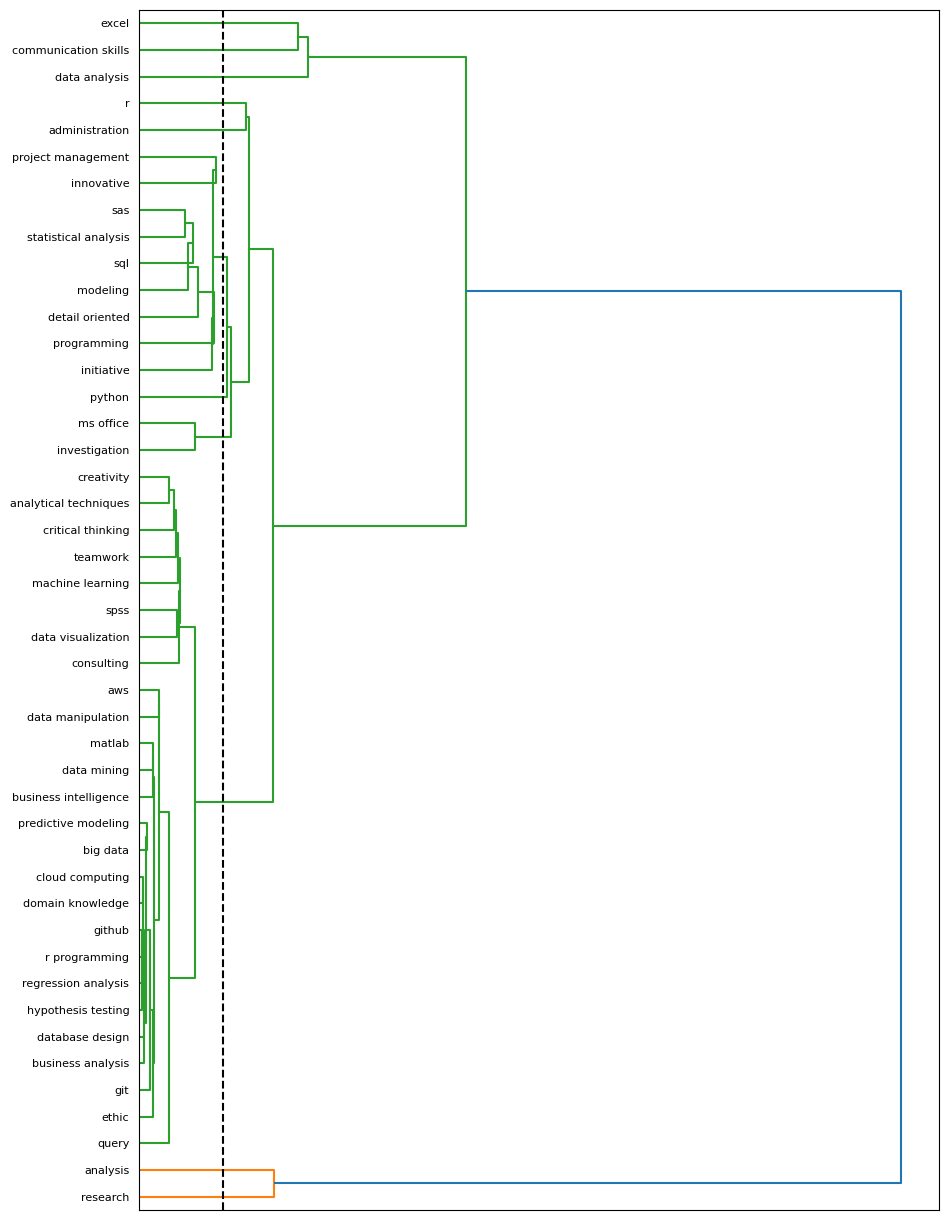

In [ ]:
# plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right')
labels = df_skills.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*distance_matrix.max(), c='k', linestyle='--')

plt.plot()

## 3.2 Develop a course Curriculum based on Clustering Results.

 From the result of our **hierarchical clustering**, we can develop a course curriculum including 8 courses in total as follows:

1.   Course 1: Communicate with Data (Analysis, Research, Excel, Communication Skills)
2.   Course 2: Introduction to Data Analytics (R, Python, Initiative, Innovative, Investigation)
3.   Course 3: Introduction to Data Science & Machine Learning (Data Visualization, Modeling, Machine Learning)
4.   Course 4: Data-Driven Reporting (Critical Thinking, SQL, Detail Oriented, Programming)
5.   Course 5: Additional Quantitative Fundamental (Matlab, Git, AWS, Ethic)
6.   Course 6: Cloud-Based Data Analysis (Database Design, Big-data, Predictive Modeling)
7.   Course 7: Data Engineering (Data Preprocessing, Data Engineering, Data Cleansing)
8.   Course 8: Advanced Data Algorithm (Deep Learning, Neural Networks, Time Series Analysis)




#  4. Kmeans Implementation:

In this section, we will use K-means algorithm to cluster skills. We will start by applying K-means algorithm using embedded description column to cluster description columns. Then, with this cluster information, we can manually engineer a few more features including skill frequency, average salary for skills, and binary indicators of skills. We can finally apply a K-means algorithm to cluster skills. In order to maximize the explained variation of our clusters, the elbow method will be used which is helpful to find optimal k number of clusters for k-means clustering.


In [ ]:
# embedding label clustering through k-means
embeddings_list = indeed_df['description_Embeddings']
embeddings_matrix = np.vstack(embeddings_list)  # Stack them into a single 2D array


# Now `embeddings_matrix` is a 2D NumPy array that can be used to fit the KMeans model
kmeans_feature = KMeans(n_clusters=5, random_state=1624)
kmeans_feature.fit(embeddings_matrix)

# Get cluster labels
embedding_clusters = kmeans_feature.labels_

In [ ]:
indeed_df['embedding_cluster'] = embedding_clusters

In [ ]:
indeed_df.head()

,Title,Company,Salary,Location,Descriptions,Extracted_Salary,ExtractedSkills,data analysis,statistical analysis,machine learning,...,r,business intelligence,spss,sas,creativity,teamwork,consulting,project management,description_Embeddings,embedding_cluster
0,Automation Scientist,AstraZeneca Pharmaceuticals Inc,Unkown,"Gaithersburg, MD 20878","location gaithersburg, md we are currently see...",76834.00,"[analysis, analytical techniques, critical thi...",0,0,0,...,0,0,0,0,0,0,0,0,"[-0.35947698, 0.120966054, 0.3096817, 0.099531...",2
1,Research Analyst Manager (Court Executive 2A),The State of New Jersey Judiciary,"$90,061.97 - $136,893.13 a year","Trenton, NJ 08611Â (Downtown area)",when you come to work for new jersey judiciary...,113477.55,"[spss, data analysis, statistical analysis, sa...",1,1,0,...,0,0,1,1,0,0,0,0,"[-0.17129058, 0.29990903, 0.28804857, 0.044956...",0
2,Global Health Data Analyst,University of Minnesota,Unkown,"Minneapolis, MN",required qualifications bs ba in an applied da...,76834.00,"[communication skills, r, teamwork, data analy...",1,0,0,...,1,0,0,0,0,1,0,0,"[-0.22275448, 0.25693396, 0.3693543, 0.1189882...",0
3,Environmental Analyst 1 (35 Hour),State of Connecticut - Department of Agriculture,"$57,291 - $81,354 a year","Milford, CT","the state of connecticut, department of agricu...",69322.50,"[communication skills, research, analysis]",0,0,0,...,0,0,0,0,0,0,0,0,"[-0.23333262, 0.27460566, 0.3293469, -0.027696...",0
4,Data Analyst/Scientist,Travis County,Unkown,"Travis County, TX",job summary travis county auditor s office has...,76834.00,"[anomaly detection, spss, consulting, statisti...",0,1,1,...,0,0,1,1,0,0,1,0,"[-0.32066697, 0.41456622, 0.4586632, 0.1659725...",1


In [ ]:
## count number of each embedding cluster
indeed_df['embedding_cluster'].groupby(indeed_df['embedding_cluster']).count()

embedding_cluster
0    280
1    380
2    303
3    319
4    186
Name: embedding_cluster, dtype: int64

## 4.1 Implement K-means Clustering Algorithm

### 4.1.1 Engineer 10 unique features to describle each skill for clustering

In [ ]:
## Check the skill list
skills_list = df_skills.columns.tolist()
skills_list

['data analysis',
 'statistical analysis',
 'machine learning',
 'data visualization',
 'python',
 'r programming',
 'sql',
 'big data',
 'predictive modeling',
 'data mining',
 'hypothesis testing',
 'regression analysis',
 'critical thinking',
 'communication skills',
 'domain knowledge',
 'cloud computing',
 'business analysis',
 'investigation',
 'programming',
 'research',
 'ethic',
 'innovative',
 'initiative',
 'modeling',
 'analysis',
 'analytical techniques',
 'github',
 'excel',
 'ms office',
 'query',
 'data manipulation',
 'detail oriented',
 'administration',
 'aws',
 'git',
 'database design',
 'matlab',
 'r',
 'business intelligence',
 'spss',
 'sas',
 'creativity',
 'teamwork',
 'consulting',
 'project management']

In [ ]:
## generate 10 features for clustering
columns = ['Skills','Skill_Freq', 'Embedding_cluster_0','Embedding_cluster_1','Embedding_cluster_2','Embedding_cluster_3','Embedding_cluster_4','Average_Salary','Data_Science','Communication','Data_Engineering']
df_features = pd.DataFrame(columns = columns).set_index('Skills')

## generate 10 features for each skill
for skill in skills_list:

  # Frequency of the skill in indeed dataset
  Skill_Freq = indeed_df[skill].sum()

  # Find which embedding cluster the skills appears the most frequently.
  embedding_class = indeed_df.groupby('embedding_cluster').sum()[skill].argmax()

  # genearte 5 binary indicators to identify which cluster the skills appears the most frequently
  Embedding_cluster_0 = 0
  if embedding_class == 0:
    Embedding_cluster_0 = 1
  Embedding_cluster_1 = 0
  if embedding_class == 1:
    Embedding_cluster_1 = 1
  Embedding_cluster_2 = 0
  if embedding_class == 2:
    Embedding_cluster_2 = 1
  Embedding_cluster_3 = 0
  if embedding_class == 3:
    Embedding_cluster_3 = 1
  Embedding_cluster_4 = 0
  if embedding_class == 4:
    Embedding_cluster_4 = 1
  # Average salary for the skill
  Average_Salary = indeed_df[indeed_df[skill]==1]['Extracted_Salary'].mean()

  # binary indicator of whether the skill belongs to data science skills
  if skill in ['data analysis', 'statistical analysis', 'machine learning', 'predictive modeling', 'data mining', 'hypothesis testing',
                          'regression analysis', 'modeling', 'python', 'r', 'matlab']:
    Data_Science = 1
  else:
    Data_Science = 0
  # binary indicator of whether the skill belongs to Communication skills
  if skill in ['communication skills', 'business analysis', 'reporting', 'presentation', 'domain knowledge']:
    Communication = 1
  else:
    Communication = 0
  # binary indicator of whether the skill belongs to data engineering skills
  if skill in ['sql', 'big data', 'cloud computing', 'database design', 'data manipulation', 'aws', 'git', 'github']:
    Data_Engineering = 1
  else:
    Data_Engineering = 0
  # add the record to the feature dataframe
  df_features.loc[skill] = [Skill_Freq,Embedding_cluster_0,Embedding_cluster_1,Embedding_cluster_2,Embedding_cluster_3,Embedding_cluster_4,Average_Salary,Data_Science,Communication,Data_Engineering]

# reset the index name to 'skills'
df_features.index.name = 'skills'




In [ ]:
df_features

,Skill_Freq,Embedding_cluster_0,Embedding_cluster_1,Embedding_cluster_2,Embedding_cluster_3,Embedding_cluster_4,Average_Salary,Data_Science,Communication,Data_Engineering,Cluster_Label,Cluster_Label_optimal_k
skills,,,,,,,,,,,,
data analysis,409.0,0.0,0.0,0.0,1.0,0.0,75677.845391,1.0,0.0,0.0,1,3
statistical analysis,168.0,0.0,1.0,0.0,0.0,0.0,80178.543155,1.0,0.0,0.0,9,3
machine learning,90.0,0.0,0.0,0.0,1.0,0.0,80353.955556,1.0,0.0,0.0,9,3
data visualization,112.0,0.0,1.0,0.0,0.0,0.0,74190.487411,0.0,0.0,0.0,6,2
python,259.0,1.0,0.0,0.0,0.0,0.0,78556.315830,1.0,0.0,0.0,5,3
r programming,5.0,1.0,0.0,0.0,0.0,0.0,76834.000000,0.0,0.0,0.0,1,3
sql,164.0,0.0,0.0,0.0,1.0,0.0,76120.844207,0.0,0.0,1.0,1,3
big data,15.0,1.0,0.0,0.0,0.0,0.0,89886.266667,0.0,0.0,1.0,7,0
predictive modeling,13.0,0.0,0.0,0.0,1.0,0.0,76116.000000,1.0,0.0,0.0,1,3


### 4.1.2 Develop a course Curriculum based on Clustering Results


In [ ]:
# k-means implementation
kmeans = KMeans(n_clusters=10, random_state=1624)
kmeans.fit(df_features)

# Get the cluster labels for each skill
labels = kmeans.labels_


# Add the cluster labels to the skills data
df_features['Cluster_Label'] = labels

# group the DataFrame by the "cluster" column
grouped = df_features.groupby("Cluster_Label")

# iterate over each cluster and print the corresponding skills
for label, group in grouped:
    print(f"Skills in cluster {label}:")
    print(group.index.tolist())

Skills in cluster 0:
['domain knowledge', 'cloud computing', 'business analysis']
Skills in cluster 1:
['data analysis', 'r programming', 'sql', 'predictive modeling', 'regression analysis', 'critical thinking', 'communication skills', 'research', 'analysis', 'github', 'query', 'data manipulation', 'business intelligence', 'project management']
Skills in cluster 2:
['hypothesis testing']
Skills in cluster 3:
['investigation', 'ethic', 'initiative', 'excel', 'git']
Skills in cluster 4:
['data mining', 'modeling']
Skills in cluster 5:
['python', 'analytical techniques', 'aws', 'r', 'sas']
Skills in cluster 6:
['data visualization', 'innovative', 'detail oriented', 'administration', 'teamwork', 'consulting']
Skills in cluster 7:
['big data', 'matlab']
Skills in cluster 8:
['ms office', 'database design']
Skills in cluster 9:
['statistical analysis', 'machine learning', 'programming', 'spss', 'creativity']


## 4.2 Use the Elbow Method to determine the optimal k for K-means Clustering
To enhence the

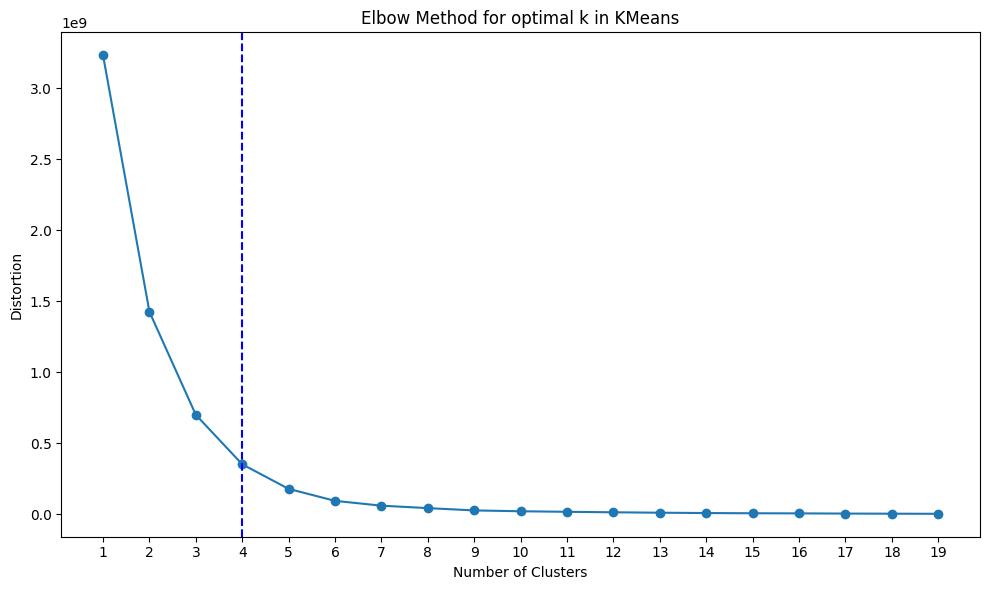

In [ ]:
# elbow method
distortions = []
for i in range(1,20):
    km=KMeans(n_clusters = i,
              init = 'k-means++', # avoid the central initialization problem
              n_init = 10,
              max_iter = 300,
              random_state = 1624)
    km.fit(df_features)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20), distortions, marker='o')
plt.axvline(x = 4, color = 'blue', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.xticks(range(1,20))
plt.title('Elbow Method for optimal k in KMeans')
plt.tight_layout()
plt.show()

In [ ]:
# k-means cluster with optimal k from elbow method
# k-means implementation
kmeans = KMeans(n_clusters=4, random_state=1624)
kmeans.fit(df_features)

# Get the cluster labels for each skill
labels = kmeans.labels_


# Add the cluster labels to the skills data
df_features['Cluster_Label_optimal_k'] = labels

# group the DataFrame by the "cluster" column
grouped = df_features.groupby("Cluster_Label_optimal_k")

# iterate over each cluster and print the corresponding skills
for label, group in grouped:
    print(f"Skills in cluster {label}:")
    print(group.index.tolist())

Skills in cluster 0:
['big data', 'domain knowledge', 'cloud computing', 'business analysis', 'matlab']
Skills in cluster 1:
['hypothesis testing']
Skills in cluster 2:
['data visualization', 'investigation', 'ethic', 'innovative', 'initiative', 'excel', 'ms office', 'detail oriented', 'administration', 'git', 'database design', 'teamwork', 'consulting']
Skills in cluster 3:
['data analysis', 'statistical analysis', 'machine learning', 'python', 'r programming', 'sql', 'predictive modeling', 'data mining', 'regression analysis', 'critical thinking', 'communication skills', 'programming', 'research', 'modeling', 'analysis', 'analytical techniques', 'github', 'query', 'data manipulation', 'aws', 'r', 'business intelligence', 'spss', 'sas', 'creativity', 'project management']


# 5. Interpretation of results and visualizations


## 5.1 Dendrogram from Hierarchical clustering Algorithm

[]

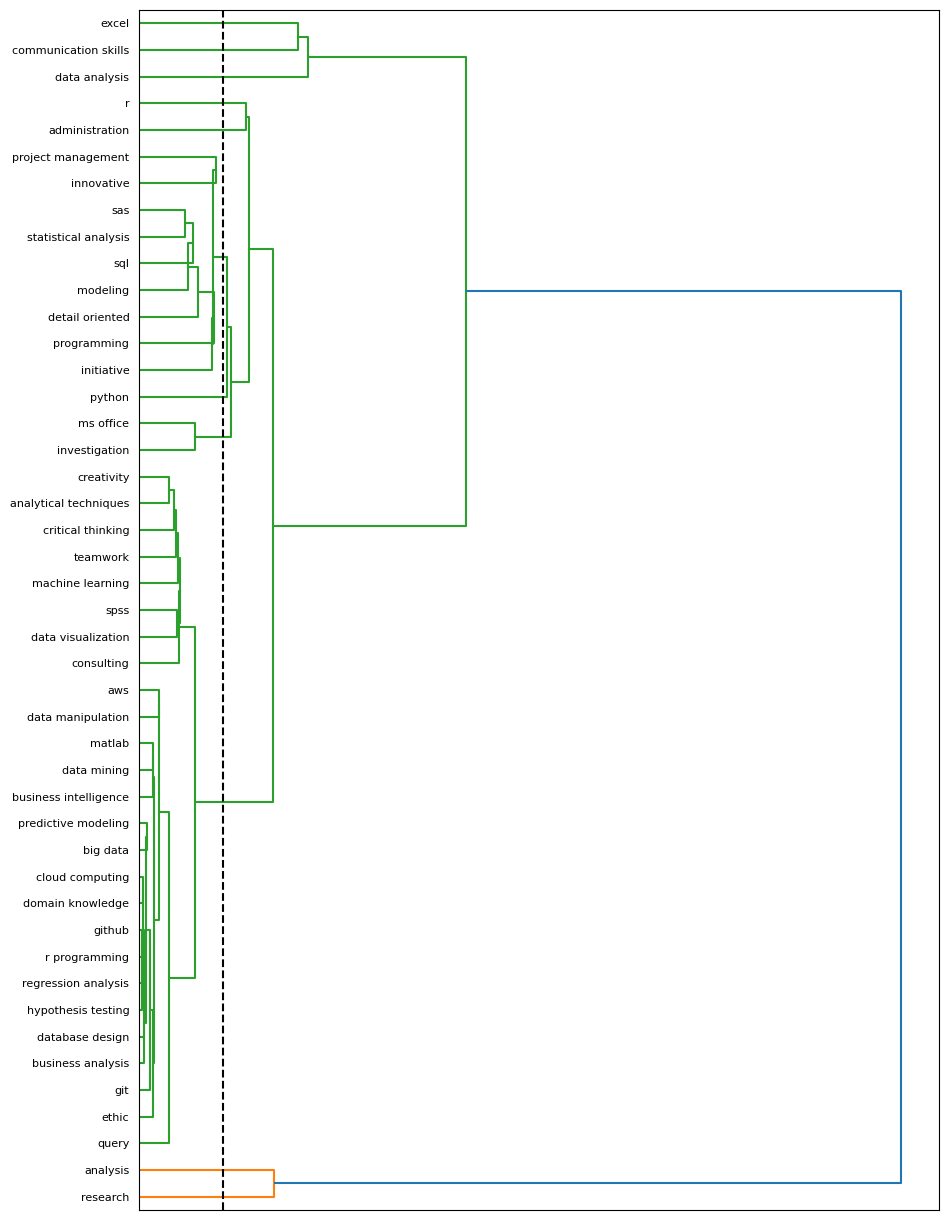

In [ ]:
# plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right')
labels = df_skills.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)
# Cutting the dendrogram at max_d
plt.axvline(x=max_d*distance_matrix.max(), c='k', linestyle='--')
plt.savefig('Hierarchical')

plt.plot() # supress prints

## 5.2 Scatterplot from k-means clustering algorithm

TO visualize the clusters, we will first apply PCA to reduce the dimension of the feature columns into 2.

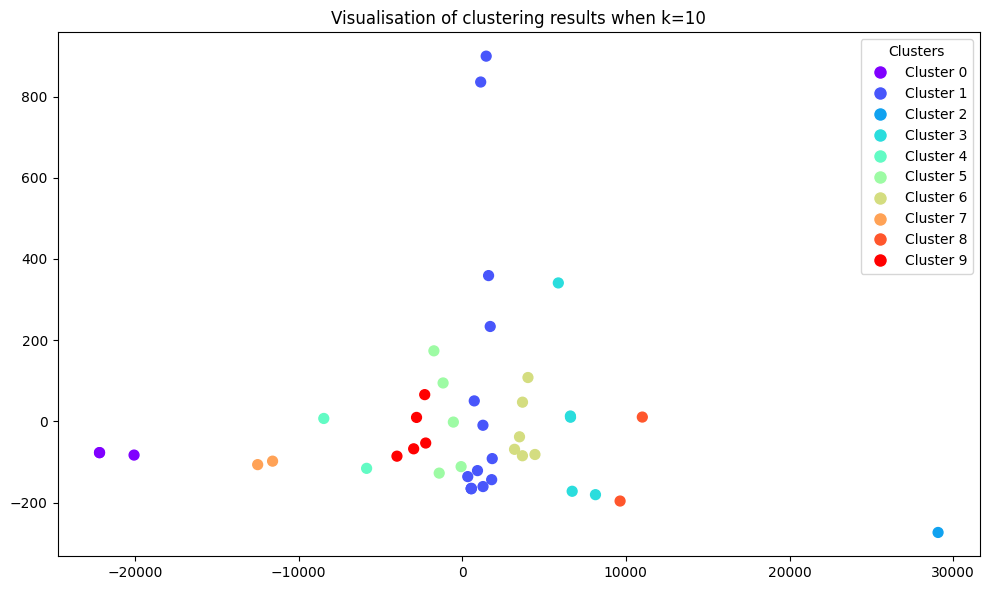

In [ ]:
# plot scatterplot by PCA in 2-d space
plt.figure(figsize=(10,6))
features_pca = PCA(2).fit_transform(df_features) # pca to reduce dimension to 2
c = df_features['Cluster_Label']
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=c, s=50, cmap='rainbow')
# Create a legend
# Generate unique labels and colors
unique_labels = list(set(c))
unique_colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]

# Create a legend mapping colors to labels
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
                               markerfacecolor=color, markersize=10) for label, color in zip(unique_labels, unique_colors)],
           title="Clusters")
plt.title('Visualisation of clustering results when k=10')
plt.tight_layout()
plt.show()

## 5.3 Visualization of Elbow Method

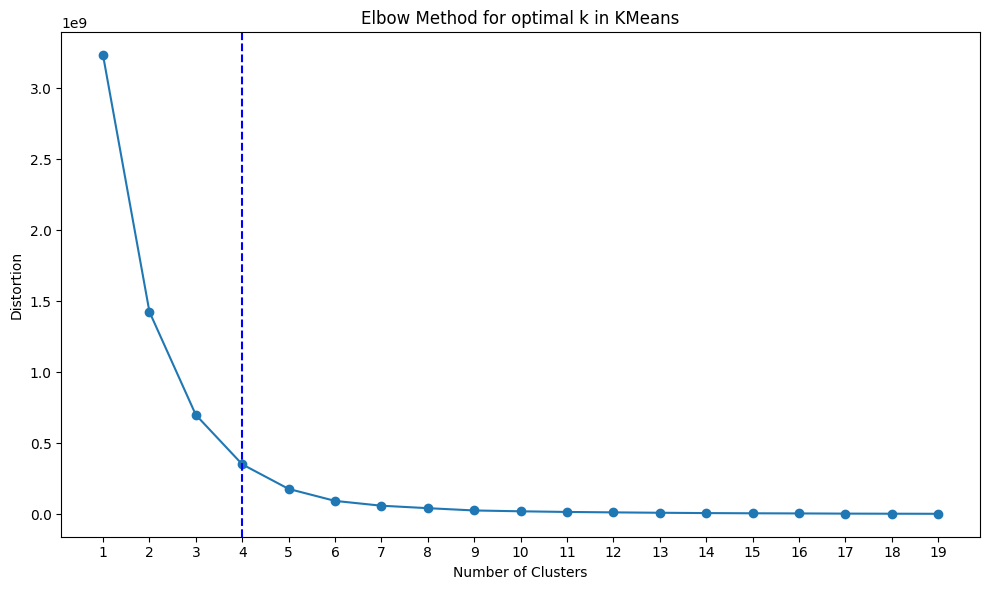

In [ ]:
# elbow method
distortions = []
for i in range(1,20):
    km=KMeans(n_clusters = i,
              init = 'k-means++', # avoid the central initialization problem
              n_init = 10,
              max_iter = 300,
              random_state = 0)
    km.fit(df_features)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20), distortions, marker='o')
plt.axvline(x = 4, color = 'blue', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.xticks(range(1,20))
plt.title('Elbow Method for optimal k in KMeans')
plt.tight_layout()
plt.show()

# 6. Discussion and Final Course Curriculum

We have successfully implemented two types of unsupervisory machine learning algorithms to cluster the skills we generated from extracted job posts.  Our analysis focuses on the data scientist and data analyst jobs in the US, as the US tends to be the most popular destination for these two jobs.

We used **hammer distance** to measure the similarity within a pair of skills because it is a more suitable method for binary indicators.  Although we were able to generate a course curriculum with eight courses according to the result of our hierarchical clustering, the limitation seemed to be obvious: the distribution of skills across clusters was uneven. In other words, some clusters had a large number of skills, while others had very few. The potential issues of using this hierarchical clustering include some courses being overloaded with content while some skills being overlooked. Therefore, we should refer to the second clustering algorithm, k-means, to design our final course curriculum.

Before implementing the K-means algorithm, we first feature-engineered a few features to describe each skill. The features we generated included skill frequency, average salary for skills, and binary indicators (data science, communication, data engineering) of skills. Then, we were able to cluster skills into ten labels. We further used the elbow method to determine the optimal k. However, the optimal **k=4** does not meet our requirement to generate a course curriculum with at least eight courses. Thus, we will use the result from k-means with k=10 to generate the final course curriculum to meet the objective of this project.

Based on the scatterplot in 5.2, we can see that there is a point on the far right of the graph that represents a cluster itself.  It is actually the point representing the skill "hypothesis test."  Since it seems to be an outlier in our skill data set and a cluster with only one skill is not informative enough to form a course, we should ignore it in the final course curriculum.

Ultimately, our final course curriculum with 9 courses, including skills to learn (STL) for each course, is as follows:



*   Course 1 - Integrate Tech-Business Skills (STL: Domain Knowledge in Business, Business Analysis)
*   Course 2 - Data Analytics and Data Management (STL: Data Analysis, R programming, SQL, Predictive Modeling)
*   Course 3 - Investigation and Office Skills (STL: Investigation, Ethic, Initiative, Excel)
*   Course 4 - Data Mining and Modeling (STL: Data Mining, Modeling, Data Factory, Cloud Computing, IoT)
*   Course 5 - Technical Foundation of Data Science (STL: Python, SAS, AWS)
*   Course 6 - Business Analytics (STL: Data Visualization, Innovative, Detail-oriented, Consulting)
*   Course 7 - Big Data and Quantitative Analytics (STL: Big Data, Matlab, Azure, Streaming Analysis)
*   Course 8 - Data Administration (STL: MS Office, Database Design, Data Warehousing, Data Cleaning and Preparation)
*   Course 9 - Advanced Data Science (STL: Statistical Analysis, Machine Learning, SPSS, Creativity, Programming)




# 7. OpenAI to Describe Clustering Results

Instead of manually giving course names according to the skills in cluster, we can use OpenAI to describe the clustering result for us by using OpenAI API.

In [ ]:
# group the DataFrame by the "cluster" column
grouped = df_features.groupby("Cluster_Label")
# Initialize an empty string to hold the output
output_string = ""

for label, group in grouped:
    # Adding the cluster label and skills to the output string
    output_string += f"Skills in cluster {label}:\n"
    output_string += ', '.join(group.index.tolist()) + '\n\n'


In [ ]:
output_string

'Skills in cluster 0:\ndomain knowledge, cloud computing, business analysis\n\nSkills in cluster 1:\ndata analysis, r programming, sql, predictive modeling, regression analysis, critical thinking, communication skills, research, analysis, github, query, data manipulation, business intelligence, project management\n\nSkills in cluster 2:\nhypothesis testing\n\nSkills in cluster 3:\ninvestigation, ethic, initiative, excel, git\n\nSkills in cluster 4:\ndata mining, modeling\n\nSkills in cluster 5:\npython, analytical techniques, aws, r, sas\n\nSkills in cluster 6:\ndata visualization, innovative, detail oriented, administration, teamwork, consulting\n\nSkills in cluster 7:\nbig data, matlab\n\nSkills in cluster 8:\nms office, database design\n\nSkills in cluster 9:\nstatistical analysis, machine learning, programming, spss, creativity\n\n'

In [ ]:
## Ask Chat-GPT
# get response
response = client.chat.completions.create(
  messages=[
      {
          "role": "user",
          "content": f"Describe what is common amongst my clusters: \n{output_string}\n",
      }
  ],
    model="gpt-3.5-turbo-16k-0613",
    seed = 300
)

In [ ]:
# Extract the answer from the response
description_on_clusters = response.choices[0].message.content

In [ ]:
# clean the response and print it
description_on_clusters = description_on_clusters.split("\n")
for sentence in description_on_clusters:
  print(sentence)

Based on the listed skills, common themes can be observed among the clusters:

Cluster 0: Skills related to technical expertise such as domain knowledge, cloud computing, and business analysis.

Cluster 1: Skills related to data analysis and statistical modeling, along with strong communication and critical thinking skills. Experience with tools like R programming, SQL, and GitHub are also present.

Cluster 2: Skills related to hypothesis testing, indicating a focus on statistical analysis and research methodologies.

Cluster 3: Skills related to investigation and ethical practices, along with proficiency in using tools like Excel and Git for data management and version control.

Cluster 4: Skills related to data mining and modeling, indicating a focus on extracting insights and developing predictive models.

Cluster 5: Skills related to programming, data analysis, and cloud computing, with proficiency in Python, AWS, R, and SAS.

Cluster 6: Skills related to data visualization, admini